<a href="https://colab.research.google.com/github/Nidzoki/PMFSTIntroToDS/blob/main/w8/w8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

### 2025./2026.

# UVOD U PODATKOVNU ZNANOST
## **Domaća zadaća  8**
#### Zadaci za samostalan rad
</div>

# Zadatak 1.

Učitajte `tips` podatke iz `seaborn` paketa.
* Provjerite da nema NaN vrijednosti u skupu podataka.
* Enkodirajte stupce `day` i `time`. Koristite `sklearn.preprocessing.LabelEncoder`, te stvorite nove stupce `day_encoded` i `time_encoded` u koje ćete spremiti rezultat.
* Ispišite koje su labele dodijeljene vrijednostima iz stupaca `day` i `time`.

In [ ]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [ ]:
tips['day_encoded'] = encoder.fit_transform(tips['day'])
tips['time_encoded'] = encoder.fit_transform(tips['time'])

In [ ]:
tips[['day_encoded','day']].value_counts()

,,count
day_encoded,day,
1,Sat,87
2,Sun,76
3,Thur,62
0,Fri,19


# Zadatak 2.
Koristeći model `sklearn.linear_model.LogisticRegression` ćete napraviti klasifikaciju napojnica gdje ćete predviđati stupac `time_encoded`.
* Za predviđanje koristite stupce `total_bill`, `tip`, `day_encoded`, `size`.
* Koristite "stratified" k-fold križnu validaciju (`sklearn.model_selection.StratifiedKFold`), s parametrom `random_state = 77` i `shuffle = True`.
* Usporedite koje točnosti (na 4 decimale) dobijete kad za broj foldova koristite `k in [2, 3, 4, 5, 6 ,7, 8, 9, 10]`, te za koji k dobijete najveću točnost.




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
regressor = LogisticRegression()

In [ ]:
X = tips[['total_bill', 'tip', 'day_encoded', 'size']]
y = tips['time_encoded']

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=77)

In [ ]:
regressor_accuracies = []
for k in range(2, 11):
    stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=77)
    fold_accuracies = []
    for train_index, test_index in stratified_kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        fold_accuracies.append(accuracy)

    average_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    regressor_accuracies.append(average_accuracy)
    print(f"Prosječna točnost {k}-fold cross-validacije: {average_accuracy:.4f}")

Prosječna točnost 2-fold cross-validacije: 0.9385
Prosječna točnost 3-fold cross-validacije: 0.9469
Prosječna točnost 4-fold cross-validacije: 0.9508
Prosječna točnost 5-fold cross-validacije: 0.9509
Prosječna točnost 6-fold cross-validacije: 0.9551
Prosječna točnost 7-fold cross-validacije: 0.9468
Prosječna točnost 8-fold cross-validacije: 0.9591
Prosječna točnost 9-fold cross-validacije: 0.9591
Prosječna točnost 10-fold cross-validacije: 0.9512


# Zadatak 3.
Podijelite podatke na skup za treniranje i testiranje (stratified split s parametrom `random_state = 25`) u omjeru 75/25, napravite postupak klasifikacije koristeći `LogisticRegression` te izračunajte:
* koliko uzoraka ima u skupu za treniranje, a koliko u skupu za testiranje
* točnost, preciznost, odziv, f1 na skupu za testiranje
* matricu konfuzije na skupu za testiranje
* nacrtajte krivulju učenja za veličine uzorka za treniranje `[50, 60, 70, 80, 90, 100]`, koristeći parametre `cv = 5`, `shuffle = True` i `accuracy` metriku.

Razmislite o rezultatima (što znače brojevi u matrici konfuzije, što znače krivulje učenja, ...).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=25, stratify=y, random_state=25)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print(f"Broj uzoraka u skupu za treniranje: {len(X_train)}")
print(f"Broj uzoraka u skupu za testiranje: {len(X_test)}")

Broj uzoraka u skupu za treniranje: 219
Broj uzoraka u skupu za testiranje: 25


In [ ]:
print(f"Točnost: {log_reg.score(X_test, y_test):.4f}")
print(f"Preciznost: {precision_score(y_test, log_reg.predict(X_test), average='weighted'):.4f}")
print(f"Odziv: {recall_score(y_test, log_reg.predict(X_test), average='weighted'):.4f}")
print(f"F1: {f1_score(y_test, log_reg.predict(X_test), average='weighted'):.4f}")

Točnost: 0.9200
Preciznost: 0.9200
Odziv: 0.9200
F1: 0.9200


<Axes: >

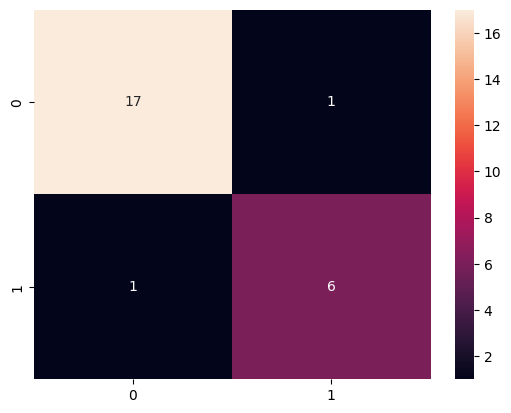

In [ ]:
sns.heatmap(confusion_matrix(y_test, log_reg.predict(X_test)), annot=True)

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


In [ ]:
curve = learning_curve(log_reg, X, y, train_sizes=[50, 60, 70, 80, 90, 100], cv=5, shuffle=True, scoring="accuracy")

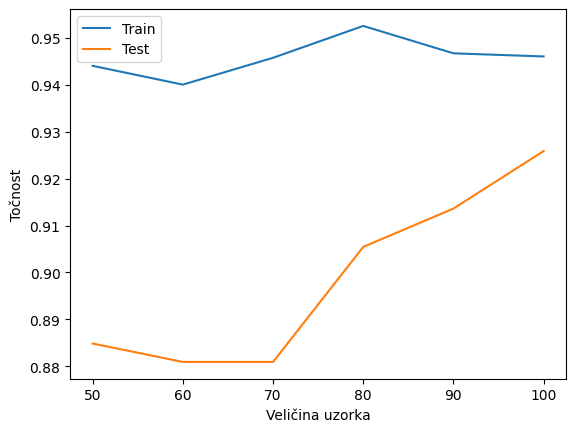

In [ ]:
sns.lineplot(x=curve[0], y=curve[1].mean(axis=1), label="Train")
sns.lineplot(x=curve[0], y=curve[2].mean(axis=1), label="Test")
plt.xlabel("Veličina uzorka")
plt.ylabel("Točnost")
plt.legend()

# Zadatak 4.


Koristeći model `sklearn.linear_model.LinearRegression` ćete napraviti multivarijabilnu linearnu regresiju na dva načina:
* predviđanje stupca `tip` koristeći stupce `size`, `day_encoded`, `time_encoded`

* predviđanje stupca `tip` koristeći stupce `total_bill`, `day_encoded`, `time_encoded`


Izračunajte MSE, RMSE, MAE za svaku od regresija te usporedite dobivene rezultate. Koji je model bolji?

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [ ]:
model1 = LinearRegression()
model2 = LinearRegression()

In [ ]:
model1.fit(tips[['size', 'day_encoded', 'time_encoded']], tips['tip'])
model2.fit(tips[['total_bill', 'day_encoded','time_encoded']], tips['tip'])

LinearRegression()

In [ ]:
print(f"MSE (size model): {mean_squared_error(tips['tip'], model1.predict(tips[['size', 'day_encoded', 'time_encoded']]))}")
print(f"RMSE (size model): {root_mean_squared_error(tips['tip'], model1.predict(tips[['size', 'day_encoded', 'time_encoded']]))}")
print(f"MAE (size model): {mean_absolute_error(tips['tip'], model1.predict(tips[['size', 'day_encoded', 'time_encoded']]))}\n")

print(f"MSE (total model): {mean_squared_error(tips['tip'], model2.predict(tips[['total_bill', 'day_encoded', 'time_encoded']]))}")
print(f"MSE (total model): {root_mean_squared_error(tips['tip'], model2.predict(tips[['total_bill', 'day_encoded', 'time_encoded']]))}")
print(f"MSE (total model): {mean_absolute_error(tips['tip'], model2.predict(tips[['total_bill', 'day_encoded', 'time_encoded']]))}")

MSE (size model): 1.4404157673691362
RMSE (size model): 1.20017322390109
MAE (size model): 0.8953127012073502

MSE (total model): 1.0351264044712862
MSE (total model): 1.017411619980471
MSE (total model): 0.7459484694115838


# Zadatak 5.

Nacrtajte krivulje učenja za svaki od modela iz **Zadatka 4** za veličine uzorka za treniranje `[50, 60, 70, 80, 90, 100]`, koristeći parametar `cv = 5` i `mean_squared_error` metriku. Što možete zaključiti?

In [ ]:
curve_1 = learning_curve(model1, tips[['size', 'day_encoded', 'time_encoded']], tips['tip'],  train_sizes=[50, 60, 70, 80, 90, 100], cv=5, scoring="neg_mean_squared_error")
curve_2 = learning_curve(model2, tips[['total_bill', 'day_encoded', 'time_encoded']], tips['tip'] ,train_sizes=[50, 60, 70, 80, 90, 100], cv=5, scoring="neg_mean_squared_error")


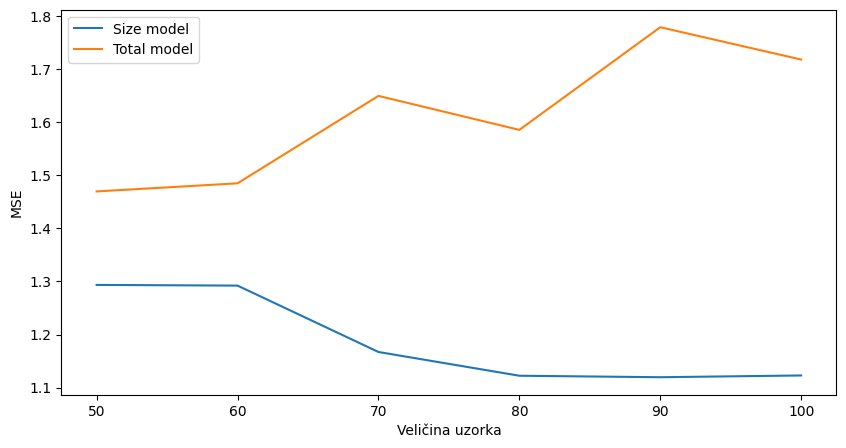

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(curve_1[0], -curve_1[1].mean(axis=1), label="Size model")
plt.plot(curve_1[0], -curve_1[2].mean(axis=1), label="Total model")
plt.legend()
plt.xlabel("Veličina uzorka")
plt.ylabel("MSE")
plt.show()

Zaključak: `model1` koji koristi stupac `size` ima manju srednju kvadratnu grešku (MSE) od `model2` koji koristi stupac `total`. Povećavanjem veličine uzorka, smanjuje se MSE kod `model1`, dok se kod `model2` greška povećava. To znači da je korištenje stupca `size` bolji izbor za model jer, povećavanjem veličine uzorka, konvergira prema stvarnoj vrijednosti koju trebamo predviditi. Korištenje stupca `total` radi suprotno, s povećanjem veličine uzorka,  divergira od vrijednosti koju trebamo predviditi.